# Statistics CA1

# Task 1 - Data Analysis:
Your task is to find a dataset of interest to you, that contains a mix of categorical and numerical variables.
As a guideline, the dataset should have a minimum of two categorical variables and three numerical
variables

  - Use of appropriate functions in Python. [15 Marks]
  - Clearly commenting the code in the .ipynb file. [5 Marks]
  - Producing clear results for the chosen dataset, using appropriate statistical measures and appropriate plots. [15 Marks]
  - The quality of the graphics included. [5 Marks]
  - Summarising the conclusions from the analysis appropriately. [30 Marks]

In [1]:
# it's advised to import all your libraries in one single cell
from IPython.display import clear_output
import pandas as pd
import matplotlib

## Describing the CEDEL2 dataset

* CEDEL2 is a large database containing the language produced by learners of Spanish as a second/foreign language (L2). This database is called a language ‘corpus’. 

* Language learners in this database do a profiencicy test as well as a writting task which are stored in two columns : Profieicncy test score and proficiency. There are also many charateristics of the learner and how much the learner has been exposed to spanish.

* I want to explore relationships between learners characteristics and their proficiency levels

* I first use the read_csv function to read the file, the shape function to show the number of rows and columns, the columns to see column names, head() to check a few row.

* there are 3041 rows and 41 columns
    * 41 columns is too many variables to analyzing in the scope of this project
    * I will drop not relevant variables for the analysis, targeting a few core variables.

* To analysise the columns with missing values I use the function is isna to check if a value is missing and the sum function sums the missing values per column and the sort_values order from lower to higher.
* Columns with most missing values:
    * Original text                                                     3034
    * Language certificates (type and level)                            2786
    * Resources used                                                    2037
    * Stay abroad (when)                                                1984
    * Stay abroad (where)                                               1976
    * Minutes taken to complete the task                                1564
    * Additional foreign language(s)                                    1546
    * Proficiency (self-assessment) in additional language writing      1526
    * Proficiency (self-assessment) in additional language reading      1508
    * Proficiency (self-assessment) in additional language listening    1505
    * Proficiency (self-assessment) in additional language speaking     1501
    * Major                                                              905
    * School/University/Institution                                      444
    * Year at university/school                                          363
    * Stay abroad (months)                                               103







In [2]:
dataframe = pd.read_csv("./data.csv",sep="\t")

In [3]:
dataframe.shape

(3034, 41)

In [4]:
dataframe.columns

Index(['Subcorpus', 'Filename', 'Year data collection',
       'Placement test score (raw)', 'Placement test score (%)', 'Proficiency',
       'Sex', 'Age', 'School/University/Institution', 'Major',
       'Year at university/school', 'L1', 'Father's native language',
       'Mother's nativelanguage', 'Languages spoken at home',
       'Age of exposure to Spanish', 'Years studying Spanish',
       'Stay abroad in Spanish speaking country (>= 1 month)',
       'Stay abroad (where)', 'Stay abroad (when)', 'Stay abroad (months)',
       'Language certificates (type and level)',
       'Proficiency (self-assessment) speaking',
       'Proficiency (self-assessment) listening',
       'Proficiency (self-assessment) reading',
       'Proficiency (self-assessment) writing',
       'Proficiency (self-assessment)', 'Additional foreign language(s)',
       'Proficiency (self-assessment) in additional language speaking',
       'Proficiency (self-assessment) in additional language listening',
    

In [5]:
dataframe.head()

,Subcorpus,Filename,Year data collection,Placement test score (raw),Placement test score (%),Proficiency,Sex,Age,School/University/Institution,Major,...,Proficiency (self-assessment) in additional language writing,Medium,Task number,Task title,Writting/audio details,Minutes taken to complete the task,Where the task was done,Resources used,Text,Original text
0,Learners,JP_WR_2_19_0.5_14_TAG,2018,2 / 43,4.7,Lower beginner,Female,19.0,teikyo universidad,espanola,...,Lower beginner (A1),Written,14,14. Chaplin,written_online,NaN,NaN,NaN,Chaplin es antipatico.\n\nNo no está grapo.\n\...,NaN
1,Learners,JP_WR_2_20_2_14_AT,2018,2 / 43,4.7,Lower beginner,Male,20.0,universidad Sophia,ciencia,...,Lower advanced (C1),Written,14,14. Chaplin,written_online,48.0,Outside classroom,Monolingual dictionary (Spanish),Chaplin ando en una calle y vio una bebé que e...,NaN
2,Learners,JP_WR_3_19_0.5_13_TBB,2019,3 / 43,7.0,Lower beginner,Male,19.0,帝京大学,外国語学部外国語学科スペイン語コース,...,Lower intermediate (B1),Written,13,13. Frog,written_online,13.0,Inside classroom,Bilingual dictionary (Spanish/Japanese),La rana está entre en una botella de vidrio.\n...,NaN
3,Learners,EN_WR_6_20_3_1_CJB,2006-2016,6 / 43,14.0,Lower beginner,Female,20.0,Georgia State University,Spanish,...,NaN,Written,1,1. Region where you live,written_online,NaN,Inside classroom,"Help from a Spanish native speaker, Bilingual ...","Yo vivo es Alanta, Georgia. Atlanta es muy gra...",NaN
4,Learners,EN_WR_7_26_2_2_TB,2006-2016,7 / 43,16.3,Lower beginner,Male,26.0,Georgia State University,Film,...,NaN,Written,2,2. Famous person,written_online,NaN,Inside classroom,NaN,Sanaa Lathan es muy famosa persona. Ella es en...,NaN


In [6]:
dataframe.isna().sum().sort_values()

Subcorpus                                                            0
Filename                                                             0
Year data collection                                                 0
Placement test score (raw)                                           0
Placement test score (%)                                             0
Proficiency                                                          0
Sex                                                                  0
L1                                                                   0
Age of exposure to Spanish                                           0
Mother's nativelanguage                                              0
Proficiency (self-assessment)                                        0
Proficiency (self-assessment) writing                                0
Proficiency (self-assessment) reading                                0
Proficiency (self-assessment) speaking                               0
Profic

## Selecting variables for analysis

* to analyse columns i simply run a for loop over the columns
    * In pandas putting the column_name inside the brackets filter only the column so I can analyse columns individually
    * I print the value counts to see the frequency of values for each column
    * I use the input function from python to wait my command to continue
    * I manually selected columns that seemed relevant
    * A create a new variable "selected_dataframe" to copy the dataframe with only the selected columns to use in the analysis
* Relevants selected columns:
### Analysing the data type of the columns I found interesting

| **Column Name**                        | **Short Description**                                           | **Statistical Datatype**    |
|----------------------------------------|-----------------------------------------------------------------|-----------------------------|
| Placement test score (%)               | Percentage of right answers in placement test                 | Numeric, Discrete         |
| Proficiency                            | Proficiency level in Spanish)   | Ordinal                     |
| Sex                                    | Gender of the learner                                           | Nominal                     |
| Age                                    | Age of the learner in years                                     | Numeric, Discrete           |
| L1                                     | First language of the learner                                   | Nominal                     |
| Years studying Spanish                 | Number of years spent learning Spanish                          | Numeric, Discrete           |
| Task title                             | Title of the language task the learner completed                | Nominal                     |

In [7]:
for column_name in dataframe.columns:
    print(column_name)
    print(dataframe[column_name].dtype)
    print(dataframe[column_name].value_counts())
    inp = input()
    if inp=="b":
        clear_output()
        break
    clear_output()

In [8]:
interesting_columns = [ 
    "Placement test score (%)", "Proficiency", "Sex",
    "Age", "L1", "Languages spoken at home", "Age of exposure to Spanish",
    "Years studying Spanish", "Proficiency (self-assessment)", "Additional foreign language(s)",
    "Task title", "Text"
]
selected_relevant_columns = [ 
    "Placement test score (%)", "Proficiency", 
    "Sex", "Age", "L1", "Years studying Spanish",
    "Task title",
]

In [23]:
for column_name in selected_relevant_columns:
    print(column_name)
    print(dataframe[column_name].dtype)
    print(dataframe[column_name].value_counts())
    inp = input()
    if inp=="b":
        clear_output()
        break
    clear_output()

### Analysing the data type of the columns I found interesting

| **Column Name**                        | **Short Description**                                           | **Statistical Datatype**    |
|----------------------------------------|-----------------------------------------------------------------|-----------------------------|
| Placement test score (%)               | Percentage of right answers in placement test                 | Numeric, Discrete         |
| Proficiency                            | Proficiency level in Spanish)   | Ordinal                     |
| Sex                                    | Gender of the learner                                           | Nominal                     |
| Age                                    | Age of the learner in years                                     | Numeric, Discrete           |
| L1                                     | First language of the learner                                   | Nominal                     |
| Languages spoken at home               | Languages spoken in the home environment                        | Nominal                     |
| Age of exposure to Spanish             | Age at which the learner was first exposed to Spanish          | Numeric, Discrete           |
| Years studying Spanish                 | Number of years spent learning Spanish                          | Numeric, Discrete           |
| Proficiency (self-assessment)          | Learner's selmf-assessment of their proficiency in Spanish       | Ordinal                     |
| Additional foreign language(s)         | Other foreign languages spoken by the learner                   | Nominal                     |
| Task title                             | Title of the language task the learner completed                | Nominal                     |
| text                                   | Text produced by the learner during the task                    | Nominal (text data)         |

In [24]:
selected_dataframe = dataframe[selected_relevant_columns].copy()

## Analysing distributions

### SUMMARY 

### Placement Test Score (%)
    * On average people get 70% of the test correct
    * Half of the sample get a score over 74.4% ~ 32 correct answers out of 43


In [25]:
selected_dataframe["Placement test score (%)"].describe()

count    3034.000000
mean       70.464634
std        21.762159
min         4.700000
25%        51.200000
50%        74.400000
75%        88.400000
max       100.000000
Name: Placement test score (%), dtype: float64

<Axes: >

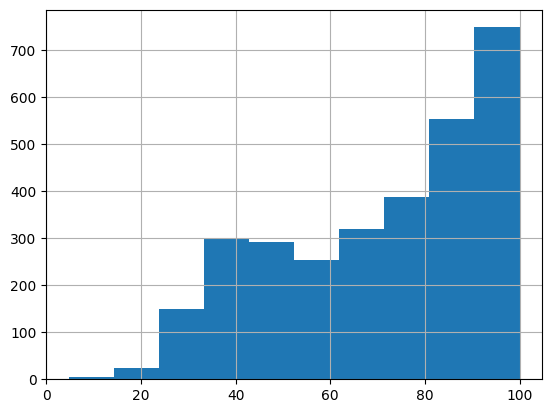

In [26]:
selected_dataframe["Placement test score (%)"].hist()

### Proficiency 
    * the sample have:
        * Upper advanced 13%
        * Lower advanced 25%
        * Upper intermediate 22%
        * Lower intermediate 18%
        * Upper beginner 17%
        * Lower beginner 3%
    * So most of learners are more advanced than beginners


In [27]:
selected_dataframe["Proficiency"].value_counts().sort_index() 

Proficiency
Lower advanced        764
Lower beginner         93
Lower intermediate    548
Upper advanced        421
Upper beginner        529
Upper intermediate    679
Name: count, dtype: int64

In [28]:
print("Upper advanced", 421/len(selected_dataframe["Proficiency"]))
print("Lower advanced", 764/len(selected_dataframe["Proficiency"]))
print("Upper intermediate", 679/len(selected_dataframe["Proficiency"]))
print("Lower intermediate", 548/len(selected_dataframe["Proficiency"]))
print("Upper beginner", 529/len(selected_dataframe["Proficiency"]))
print("Lower beginner", 93/len(selected_dataframe["Proficiency"]))

Upper advanced 0.13876071193144363
Lower advanced 0.25181278839815424
Upper intermediate 0.2237969676994067
Lower intermediate 0.1806196440342782
Upper beginner 0.17435728411338167
Lower beginner 0.030652603823335532


<Axes: >

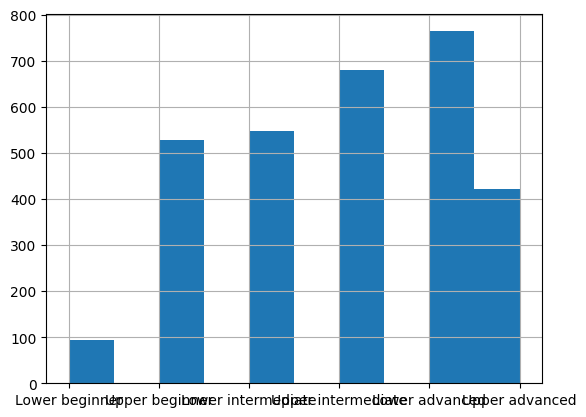

In [29]:
selected_dataframe["Proficiency"] = pd.Categorical(values=selected_dataframe["Proficiency"], categories=["Upper advanced", "Lower advanced", "Upper intermediate", "Lower intermediate", "Upper beginner", "Lower beginner"]
)
selected_dataframe["Proficiency"].hist()

### Sex

* there are in the sample
    * 72.8% women
    * 27.1% men

In [30]:
selected_dataframe["Sex"].value_counts()

Sex
Female    2210
Male       824
Name: count, dtype: int64

<Axes: >

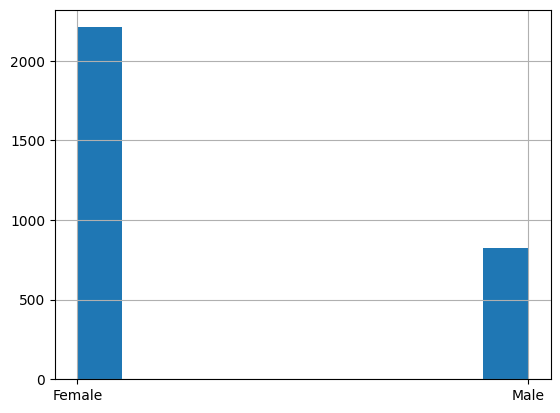

In [31]:
selected_dataframe["Sex"].hist()

In [38]:
total=3041
print("Female", 2210/total)
print("Male", 824/total)

Female 0.7267346267675107
Male 0.2709634988490628


## Age
    * On average people are approximately 25 years old
    * Half of the sample is younger than 21
    * 75% of the sample is younger than 26
    * the great majority is under 30


In [33]:
selected_dataframe["Age"].describe()

count    3030.000000
mean       24.954125
std        11.127056
min        13.000000
25%        19.000000
50%        21.000000
75%        26.000000
max        88.000000
Name: Age, dtype: float64

<Axes: >

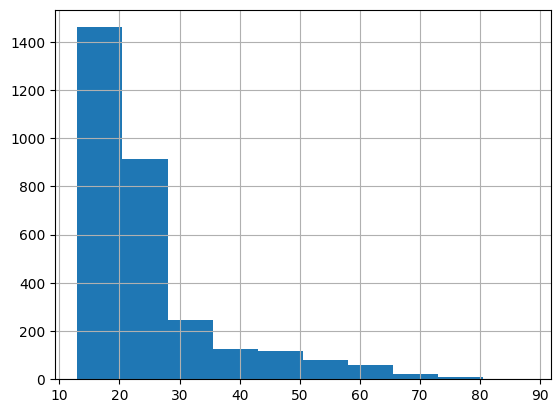

In [34]:
selected_dataframe["Age"].hist()

## First Language (L1)

* Most of the learners in the sample speak english:
    * English 63%
    * Japanese 7%
    * Greek 7%
    * Portuguese 5%
    * Russian 3%
    * Italian 2%
    * German 2%
    * Arabic 2%
    * Dutch 1%
    * French 1%
    * Chinese 0.7%


In [40]:
selected_dataframe["L1"].value_counts()

L1
English       1931
Japanese       243
Greek          216
Portuguese     164
Russian        101
Italian         83
German          82
Arabic          74
Dutch           60
French          58
Chinese         22
Name: count, dtype: int64

<Axes: >

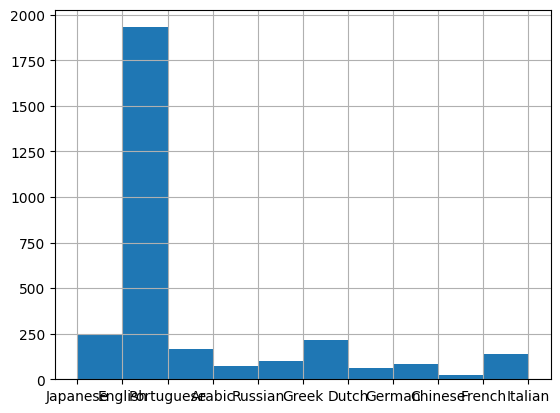

In [41]:
selected_dataframe["L1"].hist()

In [42]:
total=3041 
print("English", 1931/total)
print("Japanese", 243/total)
print("Greek", 216/total)
print("Portuguese", 164/total)
print("Russian", 101/total)
print("Italian", 83/total)
print("German", 82/total)
print("Arabic", 74/total)
print("Dutch", 60/total)
print("French", 58/total)
print("Chinese", 22/total)

English 0.6349884906280828
Japanese 0.07990792502466294
Greek 0.07102926668858928
Portuguese 0.053929628411706676
Russian 0.03321275896086814
Italian 0.027293653403485694
German 0.026964814205853338
Arabic 0.024334100624794474
Dutch 0.019730351857941468
French 0.01907267346267675
Chinese 0.007234462347911871
